### 0.0 IMPORTS

In [2]:
import pandas as pd 
import inflection 
import math
import numpy as np
from matplotlib import pyplot as plt

import seaborn as sns

from IPython.core.display import HTML
from IPython.display import Image

import datetime


In [3]:
def jupyter_settings():
    %matplotlib inline

    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24

    display(HTML('<style>.conteiner{width:100% !important;}</style>'))

    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr', False)
    # configura o pandas para quantidade de casas decimeis
    pd.set_option('display.float_format', lambda x: '%.2f' % x)

    sns.set()
jupyter_settings()

0.1 Helper fuctions

0.2 Loading Data 

In [4]:
df_sales_raw = pd.read_csv('../base_dados/train.csv', low_memory=False)
df_store_raw = pd.read_csv('../base_dados/store.csv', low_memory=False)
# Merge
df_raw = pd.merge(df_sales_raw, df_store_raw, on='Store', how='left')

### 1.0 Data Description

In [5]:
df1 = df_raw.copy()

cols_old = list(df1.columns)

### 1.1 Rename Columns 

In [6]:
snakecase = lambda x: inflection.underscore(x)

cols_rename = list(map(snakecase, cols_old))

df1.columns = cols_rename

### 1.2 Data Dimensions 

In [7]:

print('Number de Rows {} and Number de Columns {}'.format(df1.shape[0], df1.shape[1]))

Number de Rows 1017209 and Number de Columns 18


### 1.3 Data Types

In [8]:
df1['date'] = pd.to_datetime( df1['date'])

df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

### 1.4 Check NA 

In [9]:
# checking NA values sum and its percentagem from total number of rows
missing_count = df1.isnull().sum() # the count of missing values
value_count = df1.isnull().count() # the count of all values

missing_percentage = round((missing_count/value_count) *100, 2) # the percentage of missing values
missing_df = pd.DataFrame({'missing values count': missing_count, 'percentage': missing_percentage})
missing_df

,missing values count,percentage
store,0,0.00
day_of_week,0,0.00
date,0,0.00
sales,0,0.00
customers,0,0.00
open,0,0.00
promo,0,0.00
state_holiday,0,0.00
school_holiday,0,0.00
store_type,0,0.00


### 1.5 Fillout NA 

In [10]:
## competition_distance
df1['competition_distance'].max()

df1['competition_distance'] = df1['competition_distance'].apply(lambda x:200000.0 if math.isnan(x) else x)

# competition_open_since_month

df1['competition_open_since_month'] = df1.apply(lambda x: x['date'].month if math.isnan(x['competition_open_since_month']) else x['competition_open_since_month'], axis = 1)

# # ## competition_open_since_year	

df1['competition_open_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['competition_open_since_year']) else x['competition_open_since_year'], axis = 1)

# # promo2

# #'promo2_since_week' 

df1['promo2_since_week'] = df1.apply(lambda x: x['date'].week if math.isnan(x['promo2_since_week']) else x['promo2_since_week'], axis =1)

# # # promo2_since_year

df1['promo2_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['promo2_since_year']) else x['promo2_since_year'], axis =1)

# # # promo_interval

month_map = {1: 'Jan', 2: 'Feb' , 3:'Mar', 4: 'Apr', 5:'May' , 6: 'June', 7: 'Jul' , 8: 'Agu', 9: 'Sept' , 10: 'Oct', 11: 'Nov', 12: 'Dec'}

df1['promo_interval'].fillna(0, inplace= True)

df1['month_map'] = df1['date'].dt.month.map(month_map)

df1['is_promo'] = df1[['promo_interval', 'month_map']].apply(lambda x: 0 if x['promo_interval'] == 0  else 1 if (x['month_map'] in x['promo_interval'].split(',')) else 0, axis = 1 )



### 1.6 Change types of data



In [11]:
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype(int)
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype(int)

df1['promo2_since_week'] = df1['promo2_since_week'].astype(int)
df1['promo2_since_year'] = df1['promo2_since_year'].astype(int)

### 1.7 Descriptive Statistical  

In [12]:

num_attributes = df1.select_dtypes(include = ['int64', 'float64'])
cat_attributes = df1.select_dtypes(exclude= ['int64', 'float64', 'datetime64[ns]'])

cat_attributes.head()

,state_holiday,store_type,assortment,competition_open_since_month,competition_open_since_year,promo2_since_week,promo2_since_year,promo_interval,month_map
0,0,c,a,9,2008,31,2015,0,Jul
1,0,a,a,11,2007,13,2010,"Jan,Apr,Jul,Oct",Jul
2,0,a,a,12,2006,14,2011,"Jan,Apr,Jul,Oct",Jul
3,0,c,c,9,2009,31,2015,0,Jul
4,0,a,a,4,2015,31,2015,0,Jul


In [13]:
## Central Tendecy - mean, median 
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

## Dispersion -std, min, max , range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T

d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

# concatenate 

m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()

#m.drop(m.iloc[:, 7:], inplace=True, axis=1)

m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']

m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.00,1115.00,1114.00,558.43,558.00,321.91,-0.00,-1.20
1,day_of_week,1.00,7.00,6.00,4.00,4.00,2.00,0.00,-1.25
2,sales,0.00,41551.00,41551.00,5773.82,5744.00,3849.92,0.64,1.78
3,customers,0.00,7388.00,7388.00,633.15,609.00,464.41,1.60,7.09
4,open,0.00,1.00,1.00,0.83,1.00,0.38,-1.76,1.09
5,promo,0.00,1.00,1.00,0.38,0.00,0.49,0.49,-1.76
6,school_holiday,0.00,1.00,1.00,0.18,0.00,0.38,1.68,0.82
7,competition_distance,20.00,200000.00,199980.00,5935.44,2330.00,12547.65,10.24,147.79
8,promo2,0.00,1.00,1.00,0.50,1.00,0.50,-0.00,-2.00
9,is_promo,0.00,1.00,1.00,0.16,0.00,0.36,1.90,1.63


In [14]:
num_attributes.agg(['min', 'max', 'ptp', 'mean', 'median', 'std', 'skew', 'kurtosis']).T.reset_index().rename(columns={'index': 'attributes', 'ptp': 'range'})

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.00,1115.00,1114.00,558.43,558.00,321.91,-0.00,-1.20
1,day_of_week,1.00,7.00,6.00,4.00,4.00,2.00,0.00,-1.25
2,sales,0.00,41551.00,41551.00,5773.82,5744.00,3849.93,0.64,1.78
3,customers,0.00,7388.00,7388.00,633.15,609.00,464.41,1.60,7.09
4,open,0.00,1.00,1.00,0.83,1.00,0.38,-1.76,1.09
5,promo,0.00,1.00,1.00,0.38,0.00,0.49,0.49,-1.76
6,school_holiday,0.00,1.00,1.00,0.18,0.00,0.38,1.68,0.82
7,competition_distance,20.00,200000.00,199980.00,5935.44,2330.00,12547.65,10.24,147.79
8,promo2,0.00,1.00,1.00,0.50,1.00,0.50,-0.00,-2.00
9,is_promo,0.00,1.00,1.00,0.16,0.00,0.36,1.90,1.63


C:\Users\mathe\AppData\Local\Temp\ipykernel_3584\1060283804.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['competition_open_since_year']);


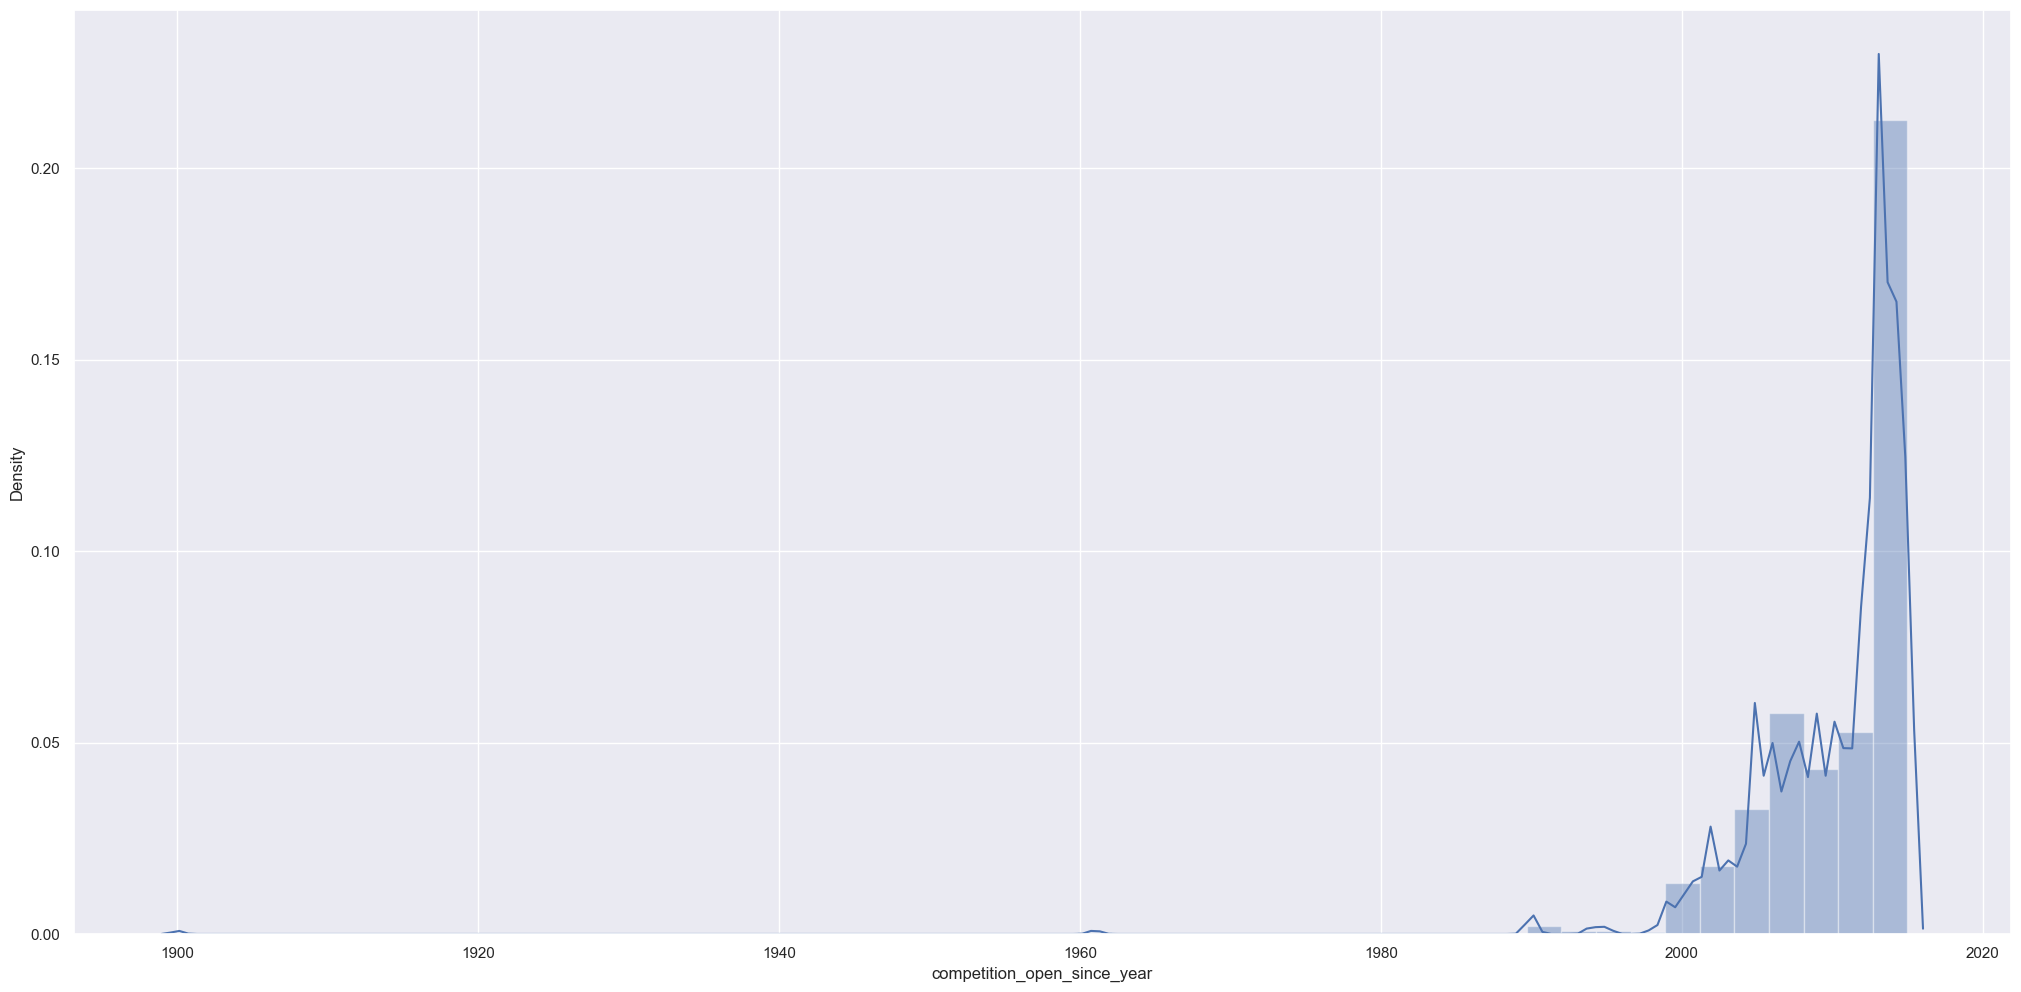

In [15]:
sns.distplot(df1['competition_open_since_year']);

In [16]:
cat_attributes.apply(lambda x: x.unique().shape[0])

state_holiday                    4
store_type                       4
assortment                       3
competition_open_since_month    12
competition_open_since_year     23
promo2_since_week               52
promo2_since_year                7
promo_interval                   4
month_map                       12
dtype: int64

### 1.7.2 Categorical Attributes

<AxesSubplot: xlabel='assortment', ylabel='sales'>

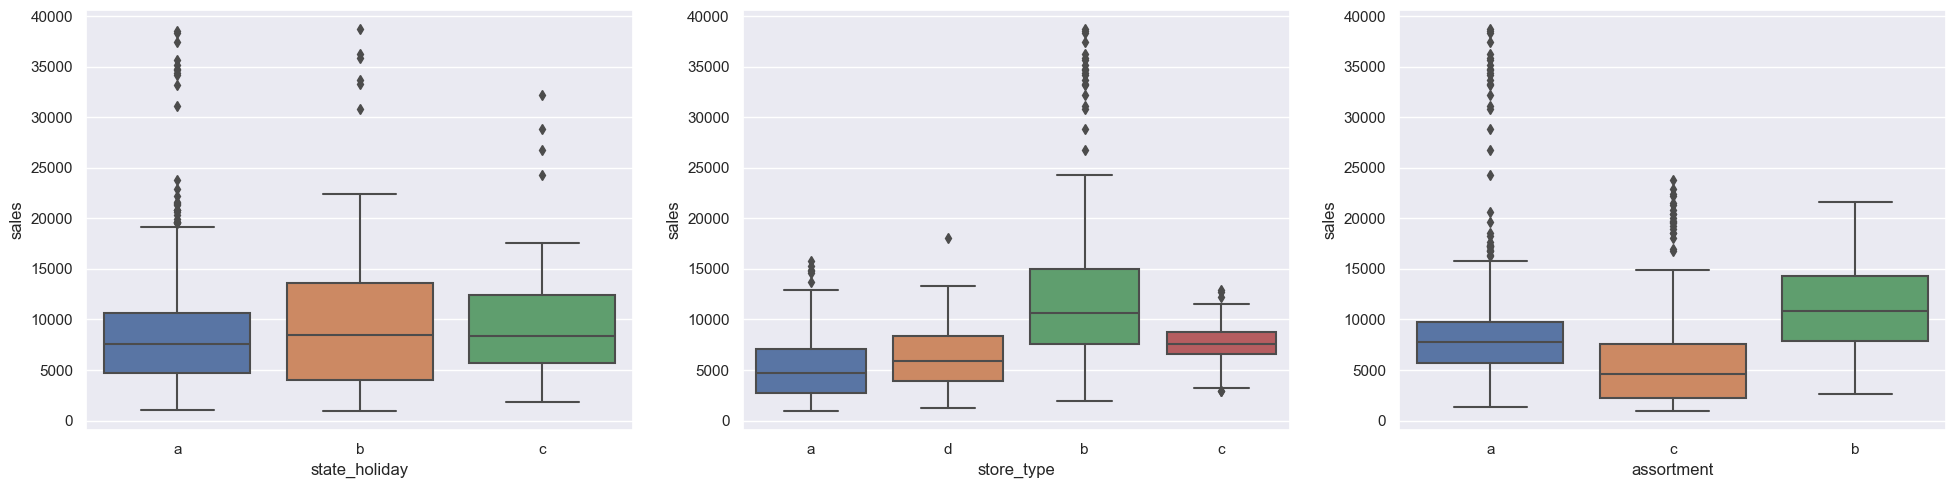

In [17]:
from matplotlib import gridspec
aux1 = df1.loc[((df1['state_holiday'] != '0') & (df1['sales'] > 0 )), :]

fig = plt.figure(figsize=(24, 12))
specs = gridspec.GridSpec( ncols=3, nrows=2, figure=fig )


ax1 = fig.add_subplot( specs[1, 0] ) # First Row First Column
ax2 = fig.add_subplot( specs[1, 1]) # Second Row First Column
ax3 = fig.add_subplot(specs[1,2]) # third row 

# plt.subplot(1,3,1)
# sns.boxplot(x = 'store_type', y= 'sales', data = aux1)

# plt.subplot(1,3,2)
# sns.boxenplot(x = 'store_type', y = 'sales', data = aux1)

# plt.subplot(1,3,3)
# sns.boxplot(x = 'assortment', y ='sales', data = aux1)





sns.boxplot(x = 'state_holiday' , y= 'sales' , data = aux1 , ax = ax1)


sns.boxplot(x = 'store_type' , y= 'sales' , data =  aux1 , ax =  ax2)


sns.boxplot( x = 'assortment', y = 'sales', data = aux1 , ax = ax3)



## 2.0 Passo 02 - FEATURE ENGINEERING

In [18]:
df2 = df1.copy()

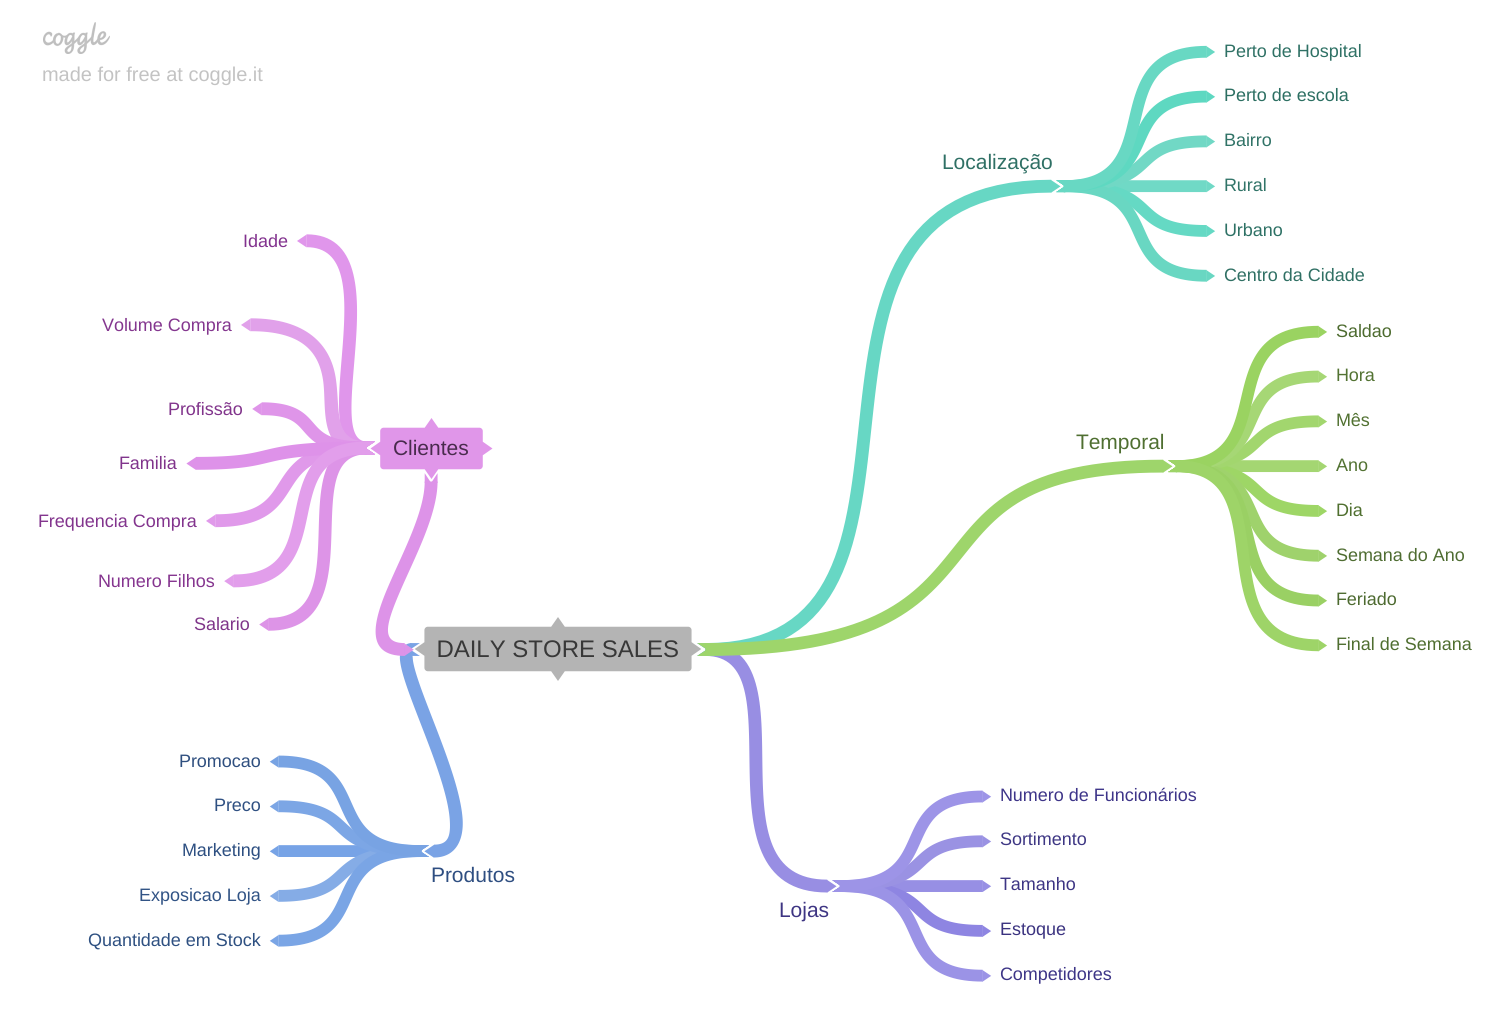

In [19]:
Image('../img/mindmapHypothesis.png')

## 2.1 Criacao das Hiposteses

### 2.1.1 Hipoteses da Loja 
**1.** Lojas com maior quadro de funcionários deveriam vender mais 

**2.** Lojas com maior estoque deveriam vender mais

**3.** Lojas com maior porte deveriam vender mais 

**4.** Lojas com maior sortimento deveriam vender mais

**5.** Lojas com competidores mais próximos deveriam vender menos

**6.** Lojas com competidores à mais tempo vendem mais 

### 2.1.2 Hipoteses Produto 

**1.** Lojas que investem mais em Marketing deveriam vender mais

**2.** Lojas que expoem mais o produtos nas vitrines deveriam vender mais

**3.** Lojas que tem precos menores nos produtos deveriam vender mais.

**4.** Loajs com promoções mais agressivas (descontos maiores), deveriam vender mais.

**5.** Lojas com promoções ativas por mais tempo deveriam vender mais.

**6.**  Lojas com mais dias de promoção deveriam vender mais.

**7.** Lojas com mais promoções consecutivas deveriam vender mais




### 2.1.3. Hipoteses Tempo

**1.** Lojas abertas durante o natal deveriam vender mais.

**2.** Lojas deveriam vender mais ao longo dos anos.

**3.** Lojas deveriam vender mais no segundo semestre do ano.

**4.** Lojas deveriam vender mais depois do dia 10 de cada mês.

**5.** Lojas deveriam vender menos aos finais de semana.

**6** Lojas deveriam vender menos durante os feriados escolares.



## 2.2 Lista Final de Hipótese 

**1** Lojas com maior sortimento deveriam vender mais

**2.** Lojas com competidores mais próximos deveriam vender menos

**3.** Lojas com competidores à mais tempo vendem mais 


**4.** Lojas com promoções ativas por mais tempo deveriam vender mais.

**5.**  Lojas com mais dias de promoção deveriam vender mais.

**6.** Lojas com mais promoções consecutivas deveriam vender mais

**7.** Lojas abertas durante o natal deveriam vender mais.

**8.** Lojas deveriam vender mais ao longo dos anos.

**9.** Lojas deveriam vender mais no segundo semestre do ano.

**10.** Lojas deveriam vender mais depois do dia 10 de cada mês.

**11.** Lojas deveriam vender menos aos finais de semana.

**12** Lojas deveriam vender menos durante os feriados escolares.


## 2.3 Feature Engineering

In [20]:
## criando novas colunas partir da coluna date

# year

df2['year'] = df2['date'].dt.year
# month 
df2['month'] = df2['date'].dt.month
# day 
# week of year
df2['week_of_year'] = df2['date'].dt.weekofyear

# year week 
df2['year_week'] = df2['date'].dt.strftime('%Y-%W')

# competition since 
df2['competition_since'] = df2.apply(lambda x: datetime.datetime( year = x['competition_open_since_year'] , month= x['competition_open_since_month'] , day = 1), axis =1)

df2['competition_time_month'] = ((df2['date'] - df2['competition_since'])/30).apply(lambda x: x.days).astype(int)

# promo since 
df2['promo_since'] = df2['promo2_since_year'].astype(str) + '-' + df2['promo2_since_week'].astype(str)

df2['promo_since'] = df2['promo_since'].apply(lambda x: datetime.datetime.strptime(x + '-1', '%Y-%W-%w')- datetime.timedelta( days = 7))

df2['promo_time_week'] = ((df2['date'] - df2['promo_since'])/7).apply(lambda x: x.days).astype(int)


# assortment 
#assortment level: a = basic, b = extra, c = extended
df2['assortment'] = df2['assortment'].apply(lambda x: 'basic' if x == 'a' else 'extra' if x == 'b' else 'extended')


# state holiday 
##  a = public holiday, b = Easter holiday, c = Christmas, 0 = None


df2['state_holiday'] = df2['state_holiday'].apply(lambda x: 'public_holiday' if x == 'a' else 'Easter_holiday' if x == 'b' else 'christmas' if x == 'c' else 'regular_day')


C:\Users\mathe\AppData\Local\Temp\ipykernel_3584\2717108212.py:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df2['week_of_year'] = df2['date'].dt.weekofyear


## 3.0 PASSO 03 - FILTRAGEM DE VARIÁVEIS 

In [21]:
df3 = df2.copy()



### 3.1 Filtragem das Linhas 


In [22]:
#### vou filtrar as linhas ,não faz sentido realizar previsao de vendas quando a loja tiver fechada 
#### e nem quando não houver vendas

df3 = df3.loc[(df3['open'] !=0 ) & (df3['sales'] > 0 ), :]

df3.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval', 'month_map', 'is_promo', 'year',
       'month', 'week_of_year', 'year_week', 'competition_since',
       'competition_time_month', 'promo_since', 'promo_time_week'],
      dtype='object')

### 3.2 Filtragem das Colunas 

In [23]:
cols_drop = ['customers', 'open', 'promo_interval', 'month_map']
df3 = df3.drop(cols_drop, axis = 1)

## 4.0 PASSO 04 - ANALISE EXPLORATORIA DOS DADOS 


In [24]:
df4 = df3.copy()

### 4.1 Analise Univariada 

#### 4.1.1. Response Variable

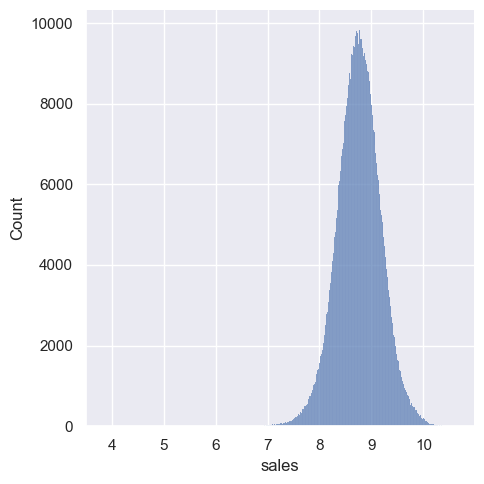

In [25]:
sns.displot(np.log1p(df4['sales']));

### 4.1.2 Numerical Variable 

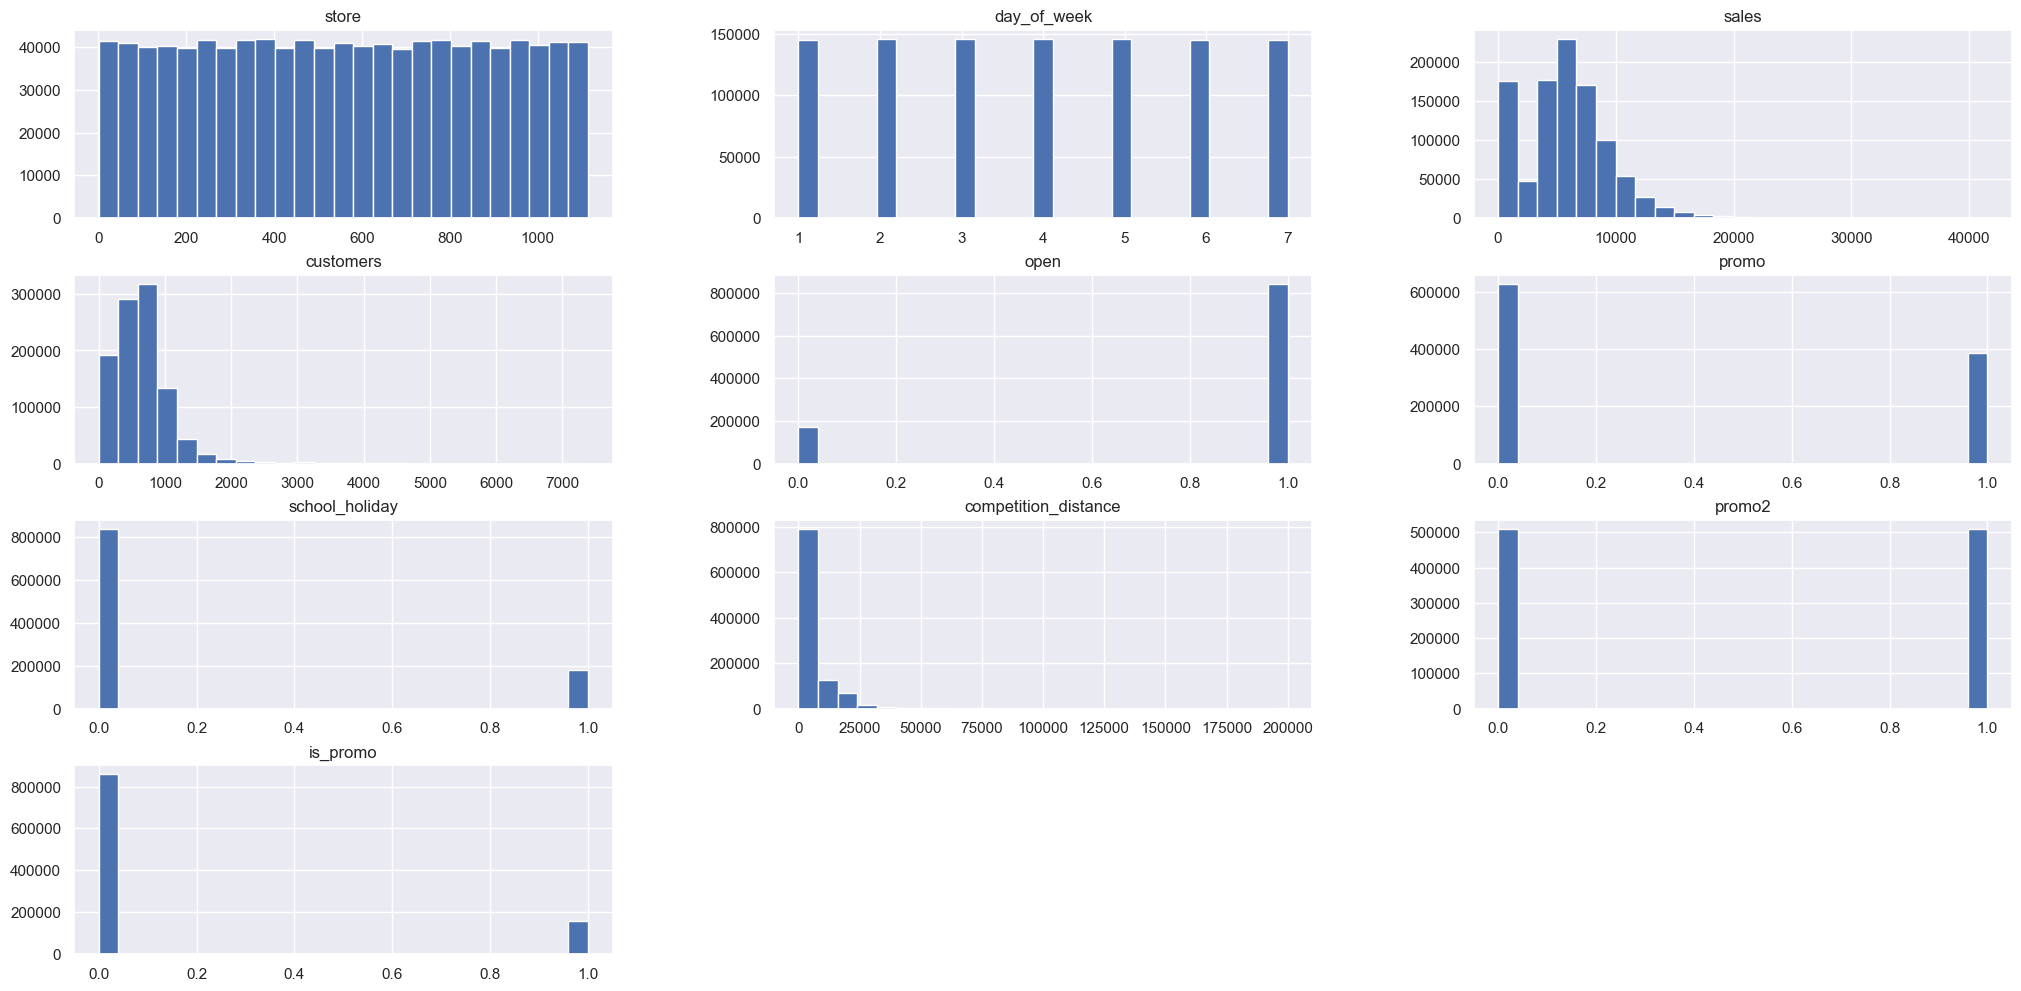

In [26]:
num_attributes.hist(bins=25);

### 4.1.3 Categorical Variable 

In [27]:
df4['state_holiday'].drop_duplicates()

0            regular_day
63559     public_holiday
129424    Easter_holiday
241126         christmas
Name: state_holiday, dtype: object

In [28]:
df4['store_type'].drop_duplicates()

0     c
1     a
12    d
84    b
Name: store_type, dtype: object

In [29]:
df4['assortment'].drop_duplicates()

0         basic
3      extended
258       extra
Name: assortment, dtype: object

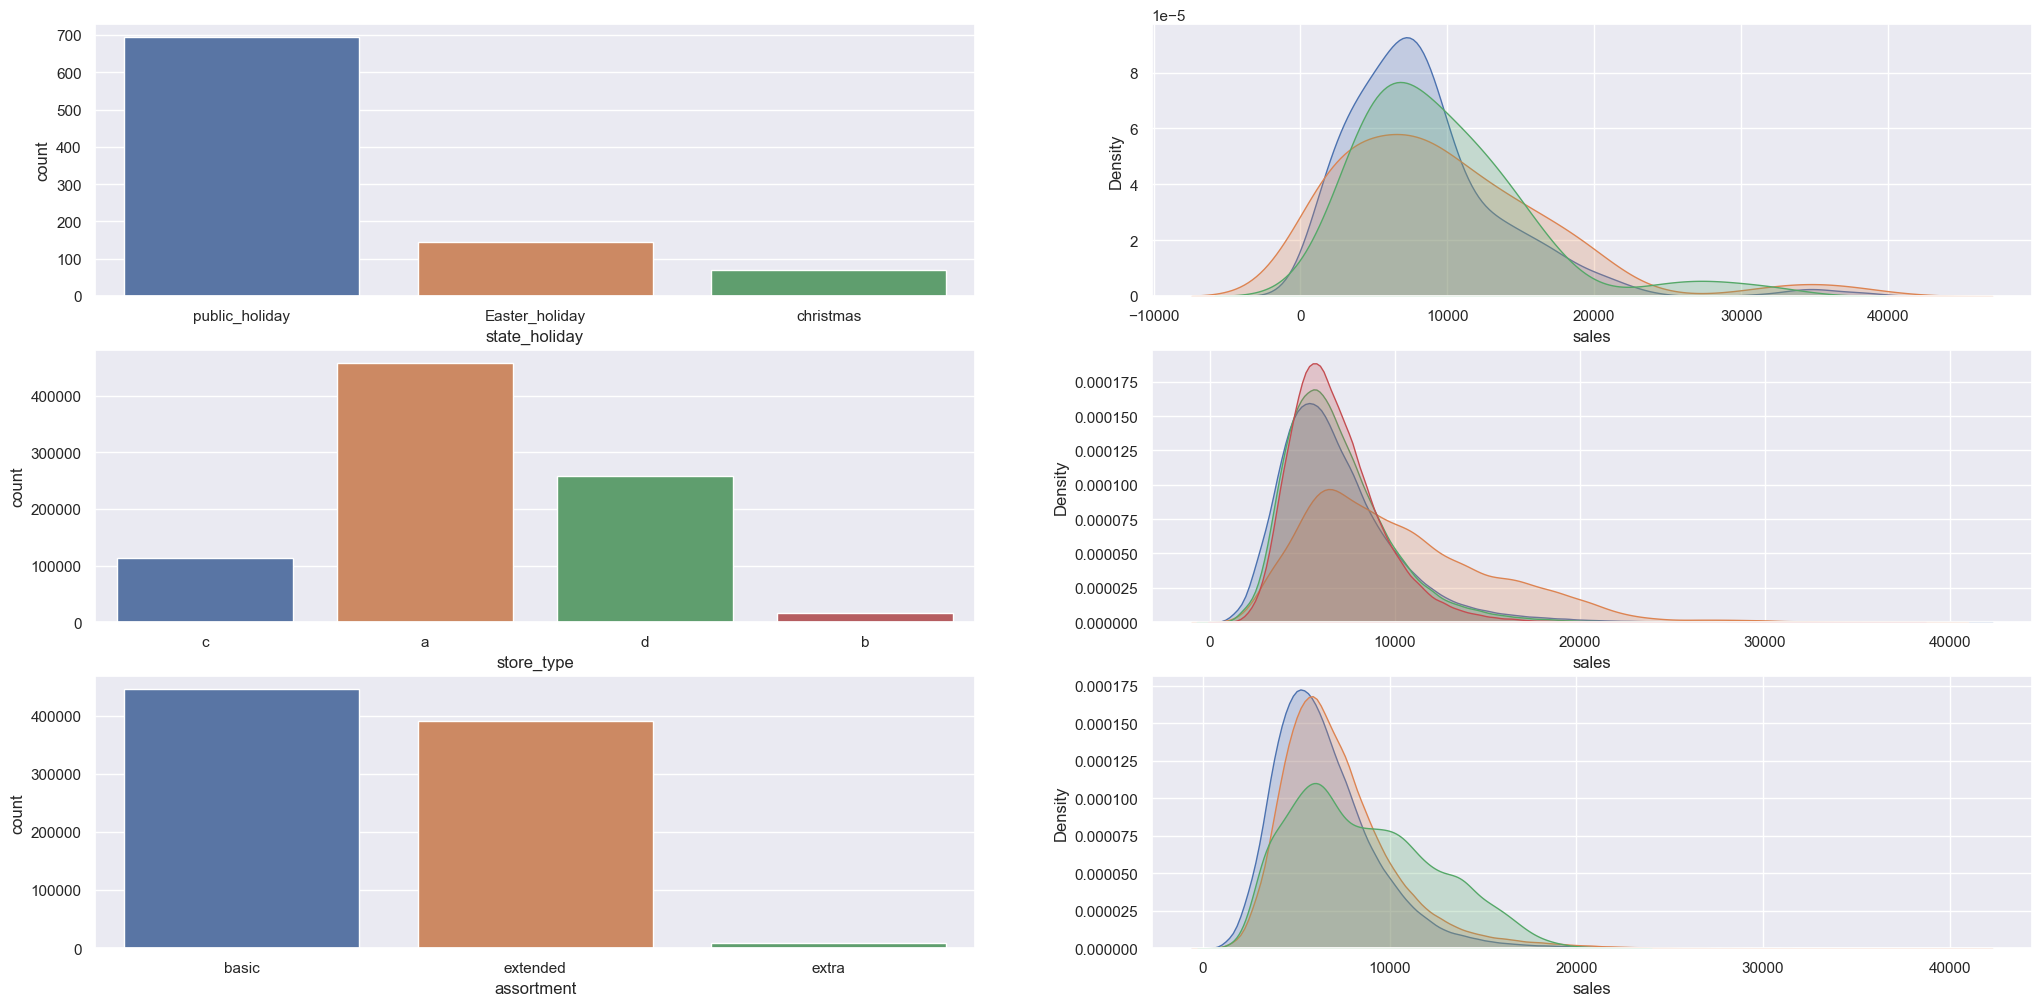

In [30]:
# state_holiday 
plt.subplot(3,2,1)
a = df4.loc[(df4['state_holiday'] != 'regular_day'), :]
sns.countplot(x = a['state_holiday']);

plt.subplot(3,2,2)
sns.kdeplot(df4.loc[(df4['state_holiday'] == 'public_holiday'), 'sales'], label = 'public_holiday', fill = True);
sns.kdeplot(df4.loc[(df4['state_holiday'] == 'Easter_holiday'), 'sales'], label = 'easter_public', fill = True);
sns.kdeplot(df4.loc[(df4['state_holiday'] == 'christmas'), 'sales'], label = 'christmas', fill = True);

## store_type
plt.subplot(3,2,3)
sns.countplot(x = df4['store_type']);

plt.subplot(3,2,4)
sns.kdeplot(df4.loc[(df4['store_type'] == 'a'), 'sales'], label = 'a', fill = True);
sns.kdeplot(df4.loc[(df4['store_type'] == 'b'), 'sales'], label = 'b', fill = True);
sns.kdeplot(df4.loc[(df4['store_type'] == 'c'), 'sales'], label = 'c', fill = True);
sns.kdeplot(df4.loc[(df4['store_type'] == 'd'), 'sales'], label = 'd', fill = True);


## assortment
plt.subplot(3,2,5)
sns.countplot(x = df4['assortment']);

plt.subplot(3,2,6)
sns.kdeplot(df4.loc[(df4['assortment'] == 'basic'), 'sales'], label = 'basic', fill = True);
sns.kdeplot(df4.loc[(df4['assortment'] == 'extended'), 'sales'], label = 'extended', fill = True);
sns.kdeplot(df4.loc[(df4['assortment'] == 'extra'), 'sales'], label = 'extra', fill = True);


### 4.2 Analise Bivariada 

### H1. Lojas com maior sortimentos deveriam vender mais
**FALSA** Lojas com MAIOR SORTIMENTO vendem MENOS  

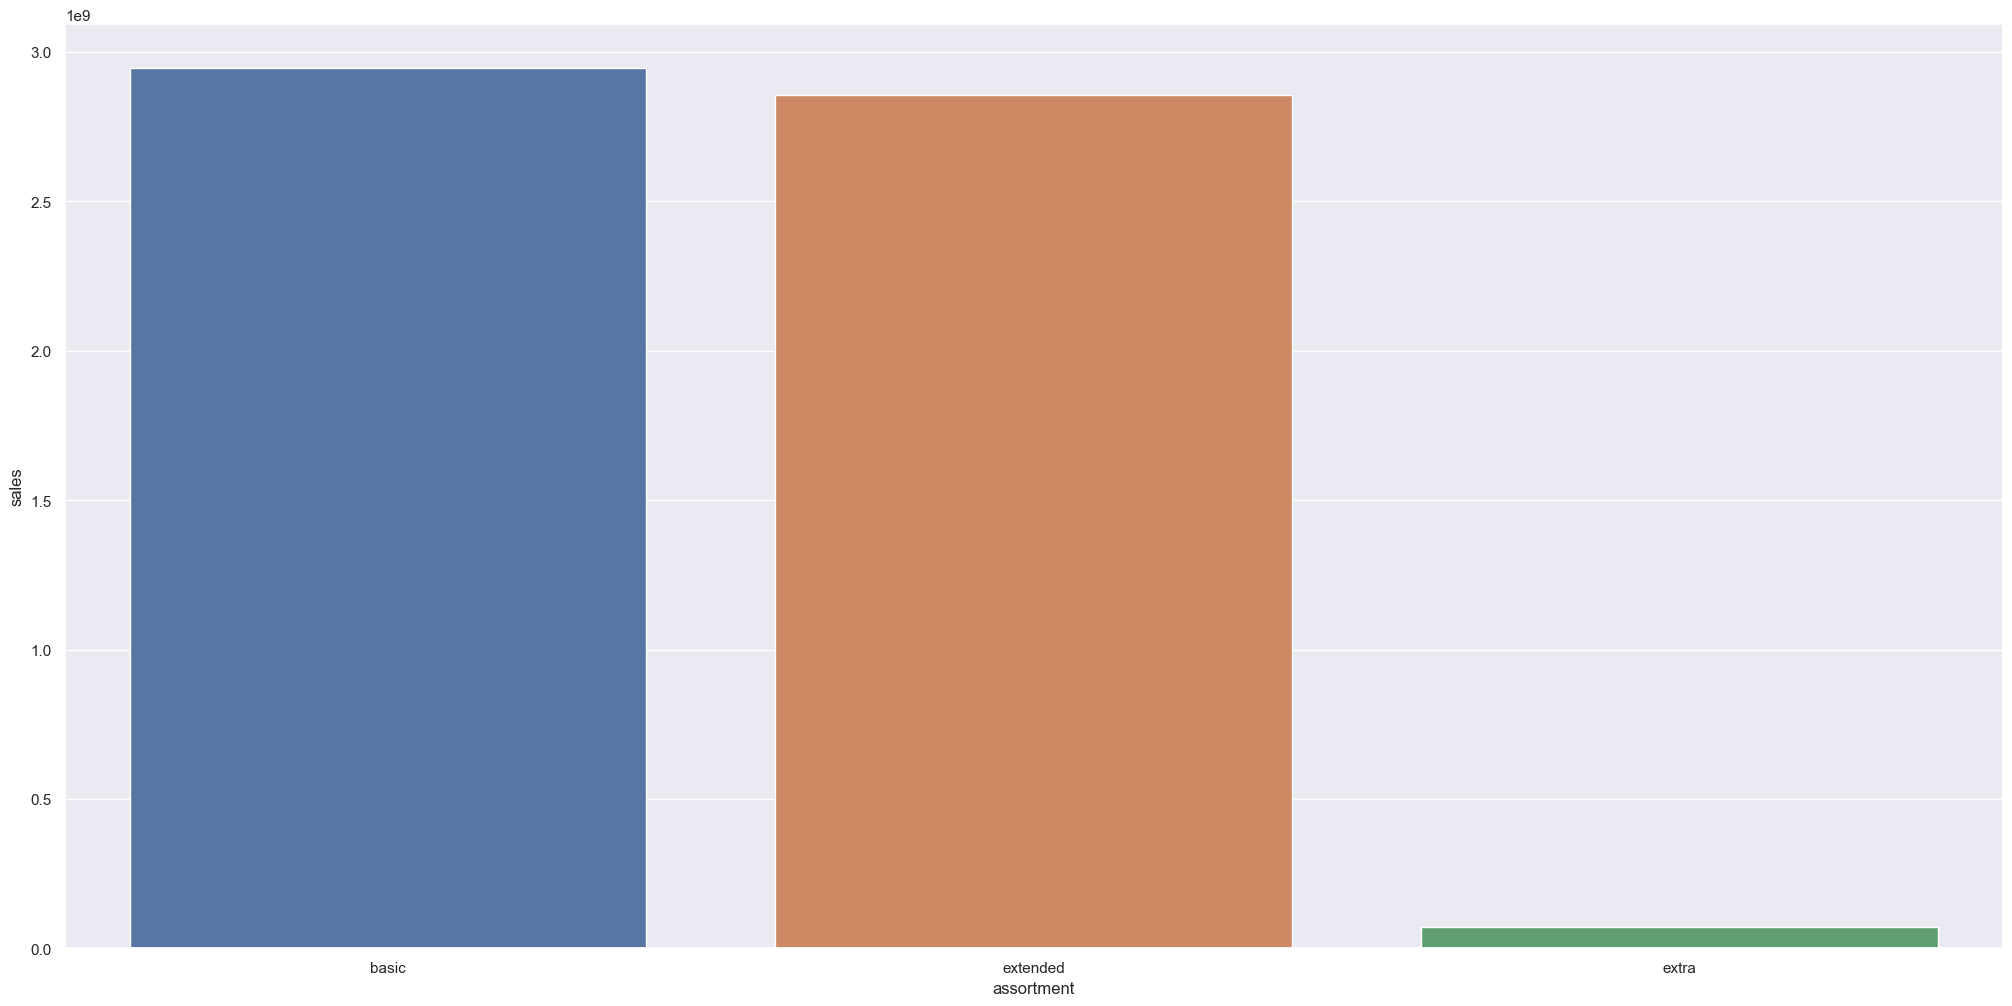

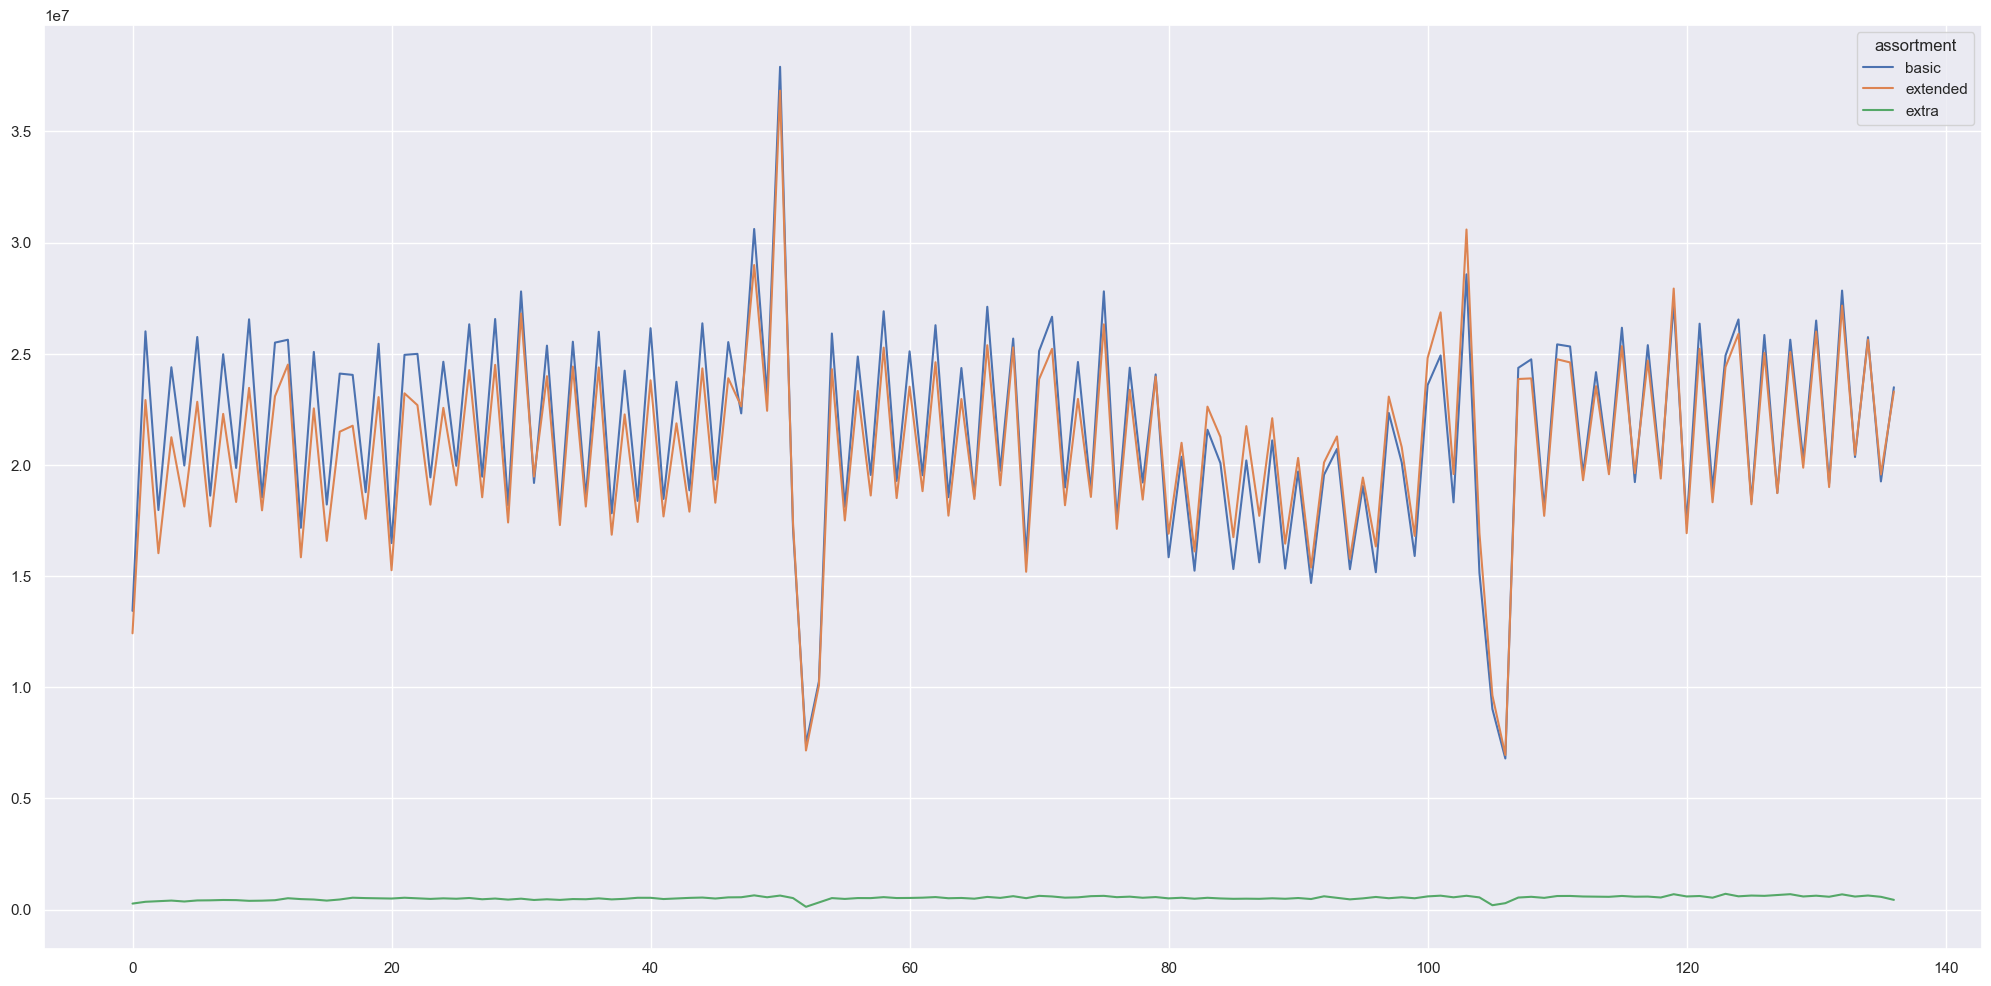

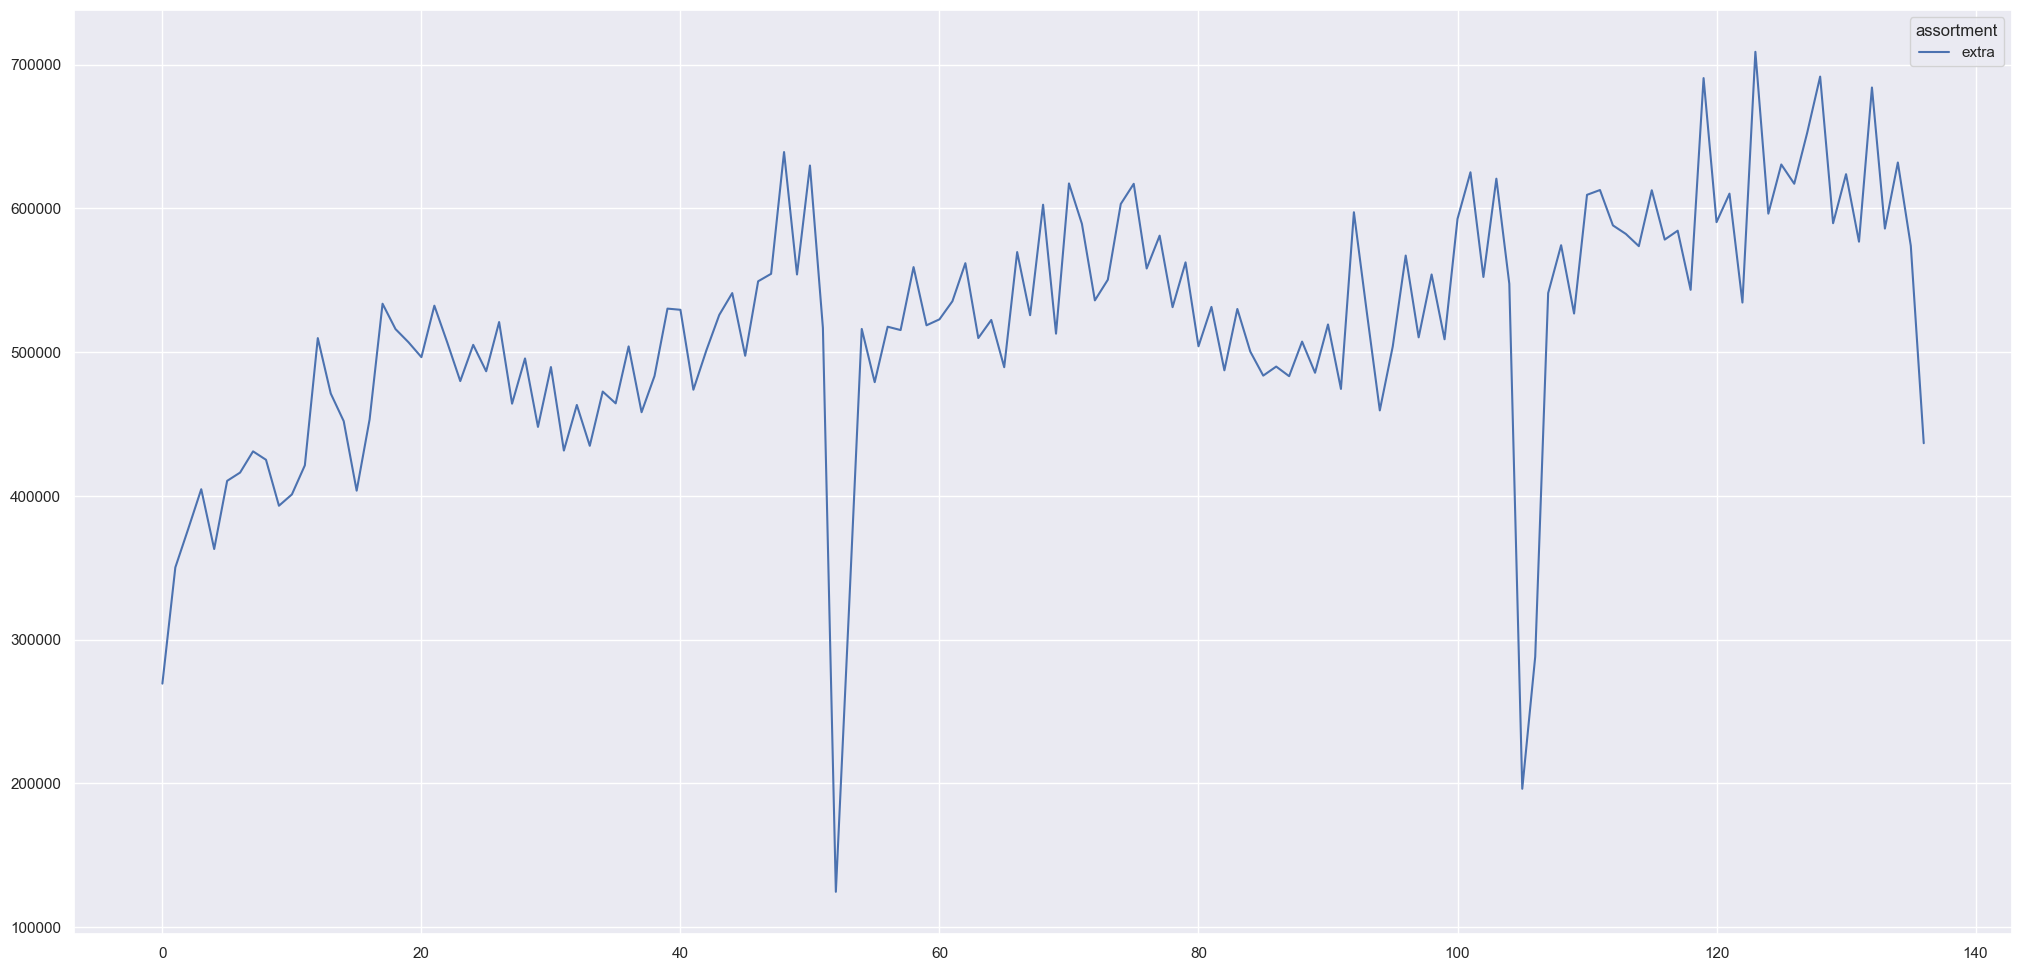

In [43]:
aux1 = df4[['assortment', 'sales']].groupby('assortment').sum().reset_index()

sns.barplot(x = 'assortment', y= 'sales', data = aux1);

aux2 = df4[['year_week', 'assortment', 'sales']].groupby(['year_week','assortment']).sum().reset_index()


aux3 = aux2.pivot(index = 'year_week' , columns = 'assortment', values = 'sales').reset_index().plot()


aux4 = aux2.loc[(aux2['assortment'] == 'extra'), :]
aux5 = aux4.pivot(index= 'year_week', columns= 'assortment' , values = 'sales').reset_index().plot()


### **H2** Lojas com competidores mais próximos deveriam vender menos
**FALSA** Lojas que tem competidores mais próximos vendem MAIS e NÃO MENOS 

C:\Users\mathe\AppData\Local\Temp\ipykernel_3584\1169306335.py:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  x = sns.heatmap(aux1.corr(method= 'pearson'), annot = True);


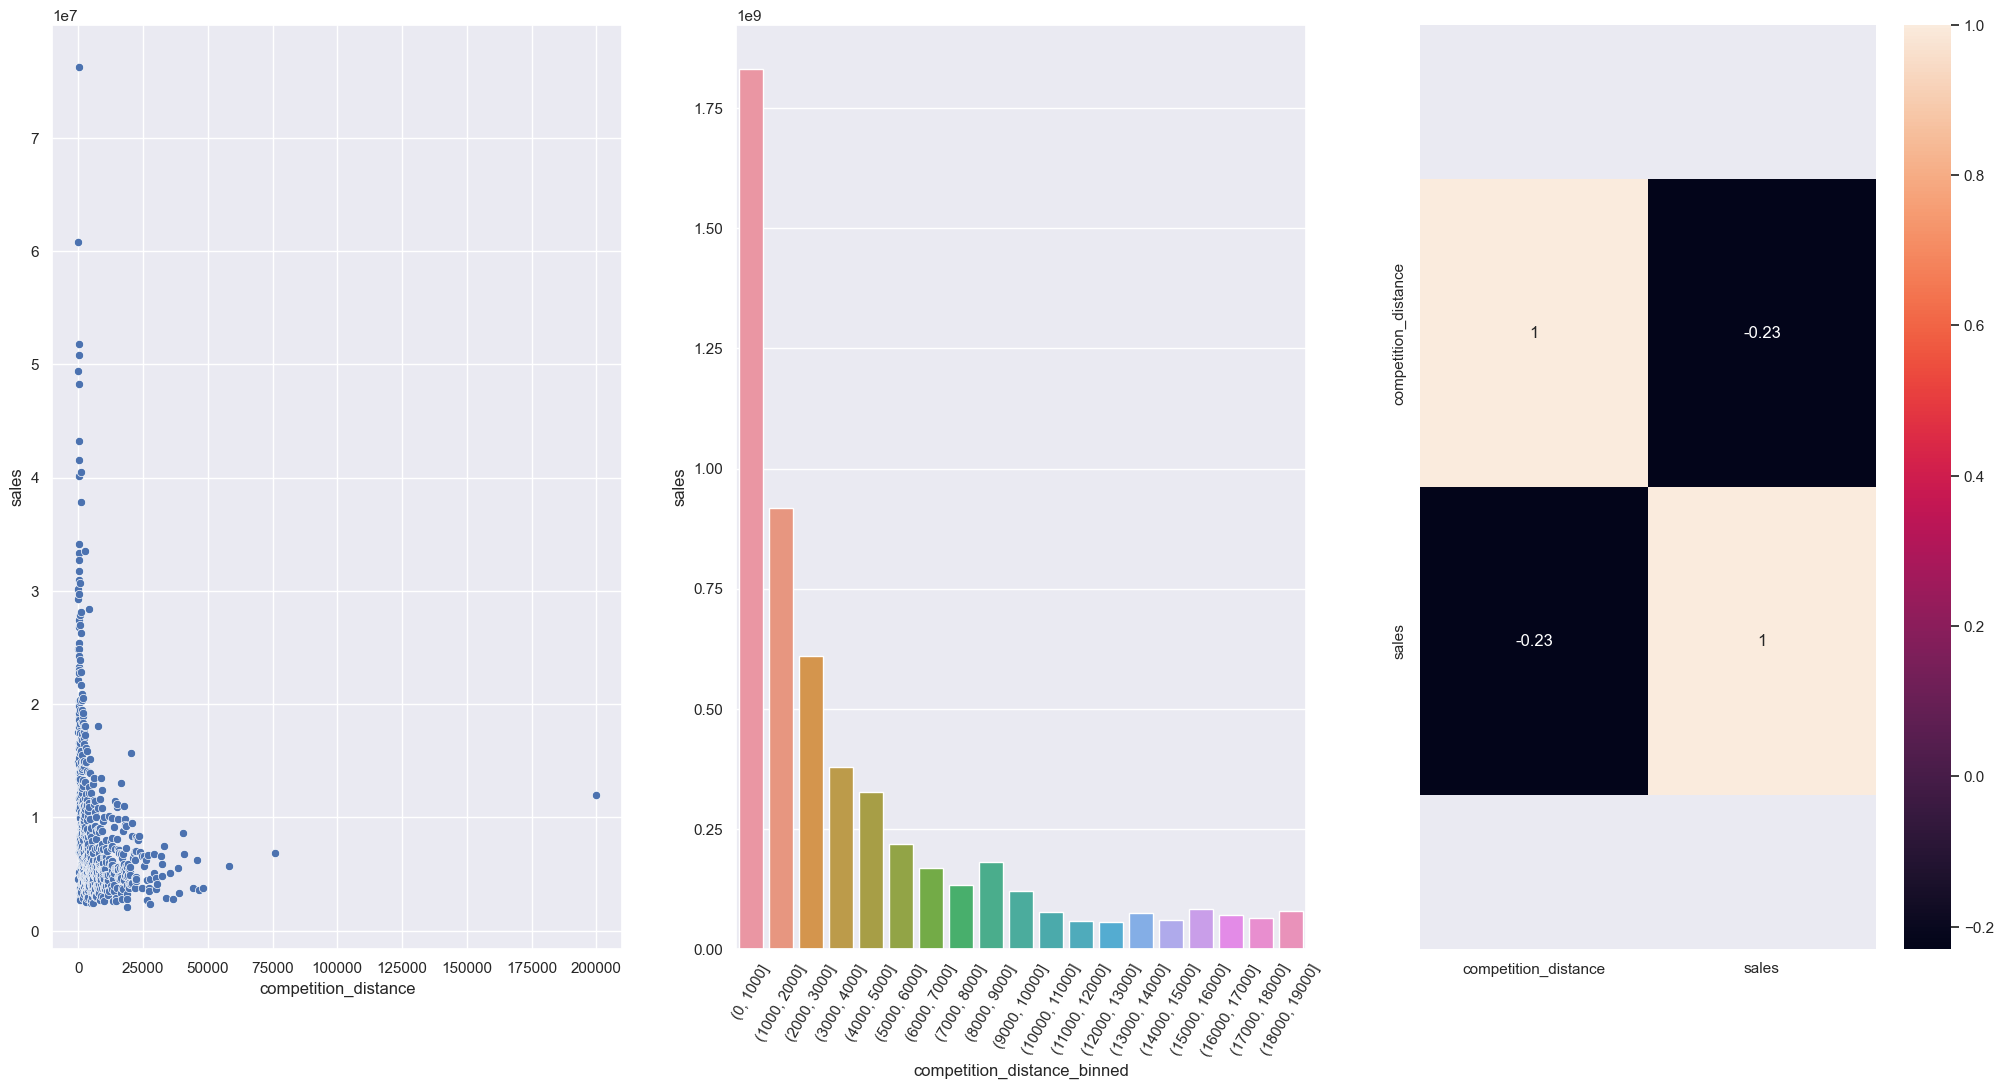

In [66]:
aux1 = df4[['competition_distance','sales']].groupby('competition_distance').sum().reset_index()

plt.subplot(1,3, 1)
sns.scatterplot(x = 'competition_distance', y = 'sales' , data = aux1)

plt.subplot(1,3, 2)
bins = list(np.arange(0,20000, 1000))
aux1['competition_distance_binned'] = pd.cut(aux1['competition_distance'], bins = bins)
aux2 = aux1[['competition_distance_binned','sales']].groupby('competition_distance_binned').sum().reset_index()

sns.barplot(x = 'competition_distance_binned', y = 'sales', data = aux2 );
plt.xticks(rotation = 60)

plt.subplot(1,3, 3)
x = sns.heatmap(aux1.corr(method= 'pearson'), annot = True);

bottom, top = x.get_ylim()

x.set_ylim (bottom + 0.5 , top-0.5);


### **H3.** Lojas com competidores à mais tempo vendem mais 
**FALSE** Lojas com COMPETIDORES à mais tempo vendem MENOS 

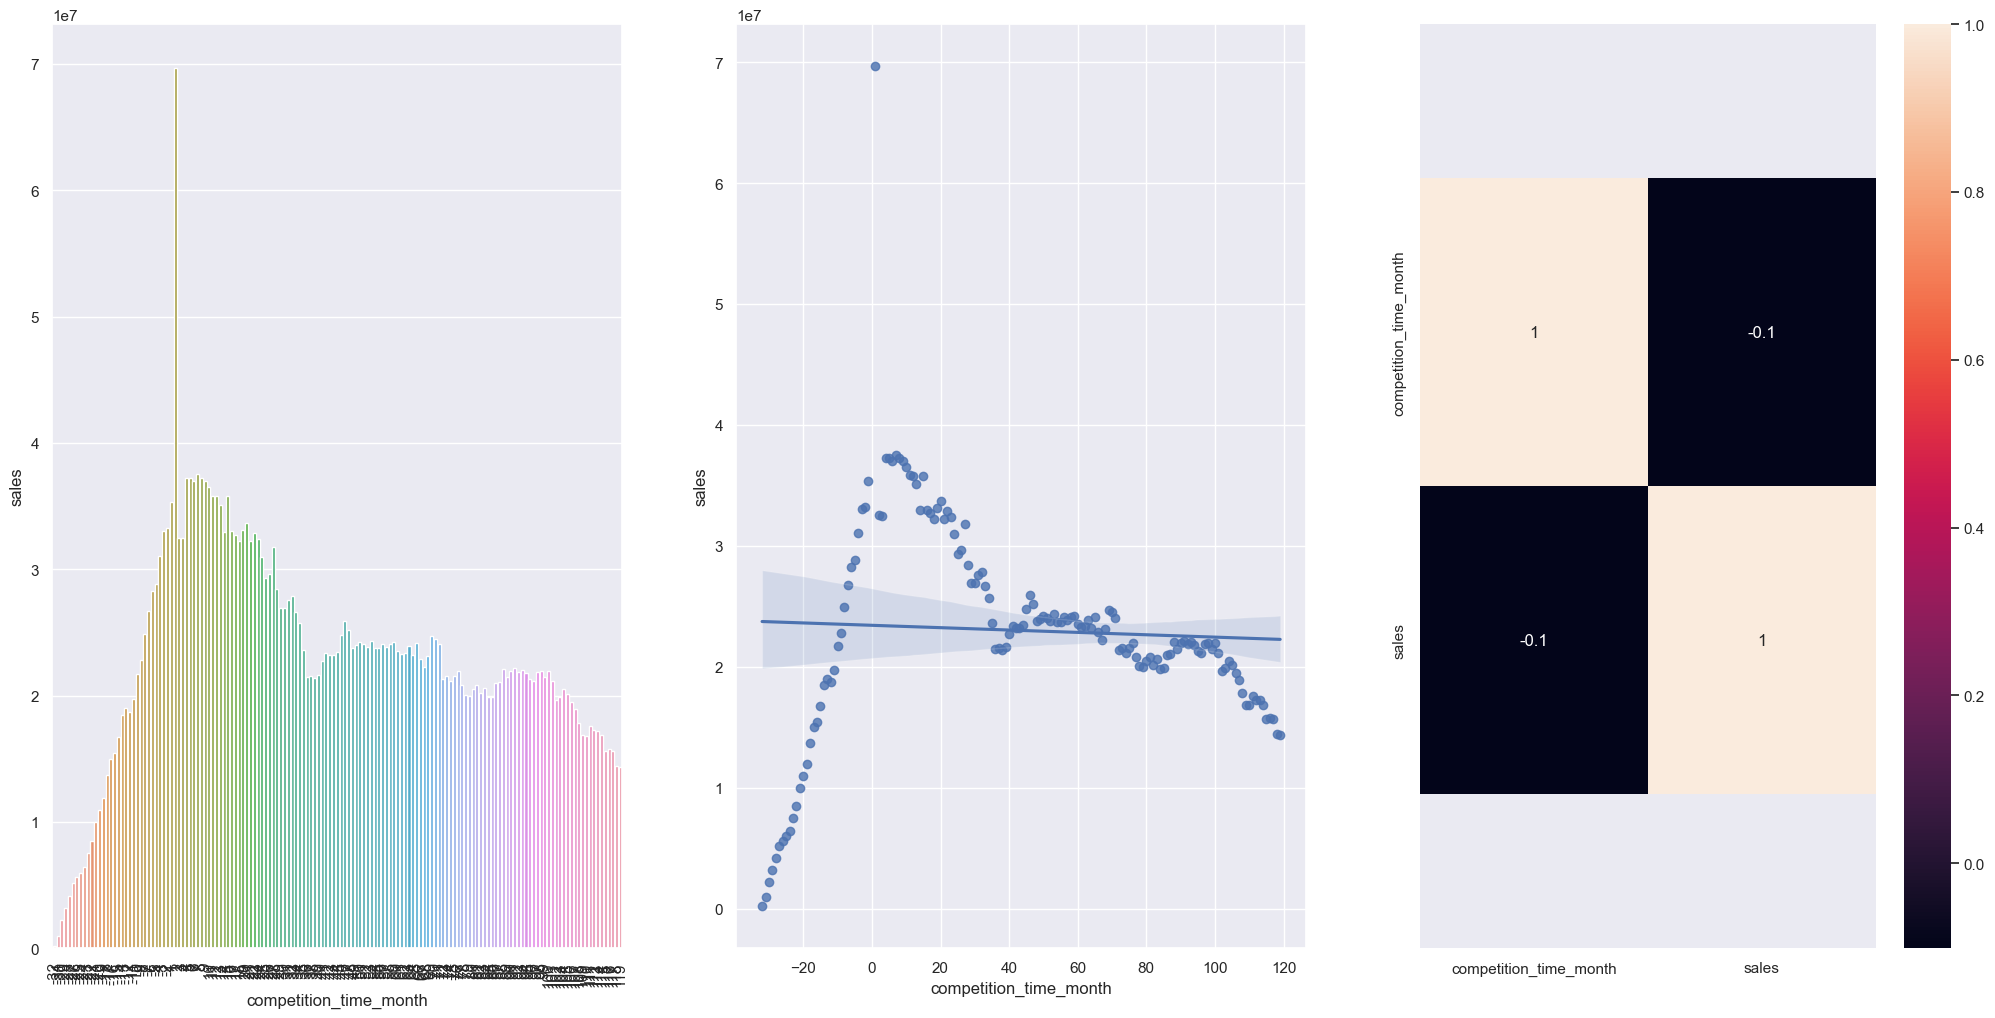

In [79]:

plt.subplot(1,3,1)
aux1 = df4[['competition_time_month','sales']].groupby('competition_time_month').sum().reset_index()
aux2 = aux1.loc[(aux1['competition_time_month'] < 120) & (aux1['competition_time_month'] != 0), :]
sns.barplot(x = 'competition_time_month' , y = 'sales' , data = aux2);
plt.xticks(rotation = 90)

plt.subplot(1,3,2)
sns.regplot(x = 'competition_time_month' , y = 'sales' , data = aux2);


plt.subplot(1,3, 3)
x = sns.heatmap(aux1.corr(method= 'pearson'), annot = True);


bottom, top = x.get_ylim()
x.set_ylim (bottom + 0.5 , top-0.5);